In [1]:
import scanpy as sc
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
import pandas as pd
import anndata as ad
from collections import Counter
import numpy as np
def find_files(directory, substring, extension):
    # 存储符合条件的文件路径
    matching_files = []
    # 遍历给定目录及其所有子目录
    for root, dirs, files in os.walk(directory):
        # 检查每个文件
        for file in files:
            # 检查文件名是否包含特定子字符串并且以特定扩展名结尾
            if substring in file and file.endswith(extension):
                # 如果符合条件，添加完整路径到列表
                matching_files.append(os.path.join(root, file))
    return matching_files

In [5]:
files = find_files('/data/twang15/spatial_protein/CODEX_data/hubmap/anndata/large_intestine', 'raw', '.h5ad')

In [10]:
files[0].split('/')[-3] + '_' + files[0].split('/')[-2]

'HBM942.WHFC.488_reg001'

In [11]:
adatas = []
for file in tqdm(files):
    id = file.split('/')[-3] + '_' + files[0].split('/')[-2]
    adata = sc.read_h5ad(file)
    adata.obs['Tissue'] = id
    adatas.append(adata)
adata_raw = ad.concat(adatas, axis=0)
adata_raw.obs[['x', 'y']] = adata_raw.obsm['xy']
adata_raw.obs[['x', 'y']] = adata_raw.obsm['xy']
adata_raw.obs['Tissue'] = adata_raw.obs['Tissue'].astype('category')
adata_raw.obs['Tissue'] = adata_raw.obs['Tissue'].cat.rename_categories([f'Reg{str(i+1).zfill(3)}' for i in range(adata_raw.obs['Tissue'].cat.categories.size)])


100%|██████████| 36/36 [00:06<00:00,  5.38it/s]
/data/twang15/mamba/envs/mip/lib/python3.8/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


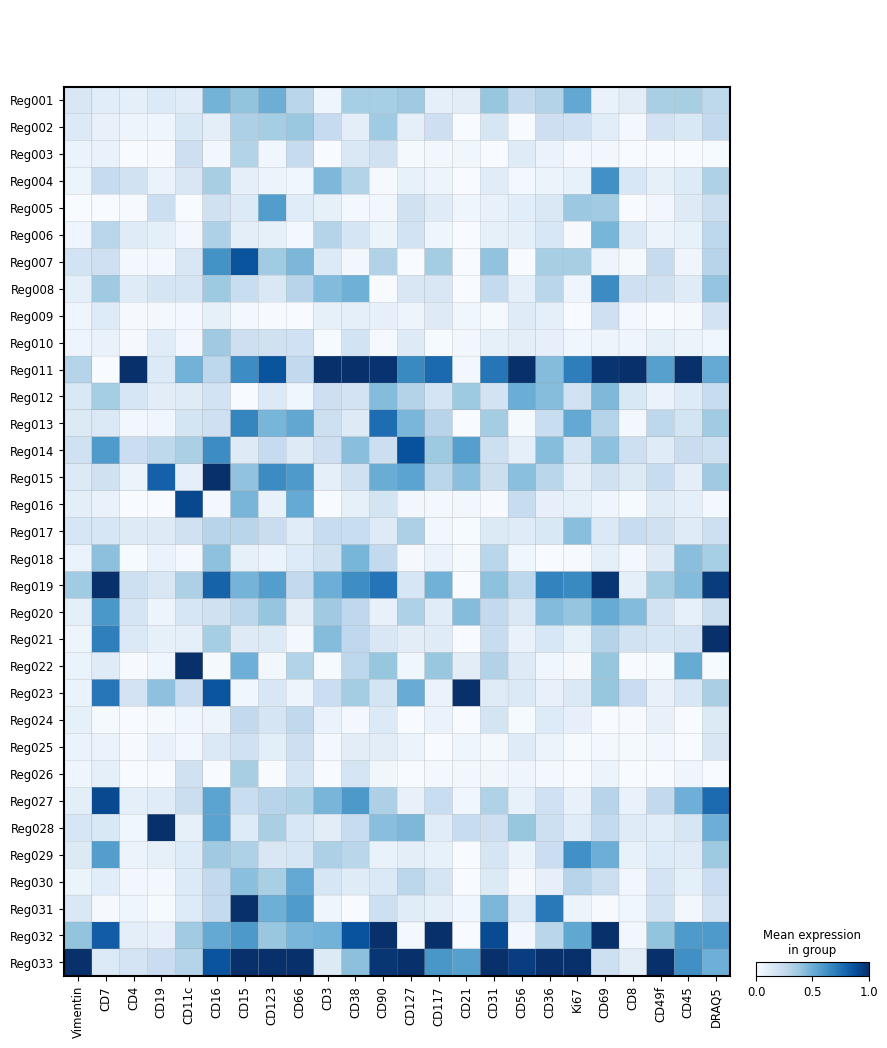

In [20]:
plt = sc.pl.matrixplot(adata_raw, adata_raw.var_names.to_list(), 'Tissue', cmap='Blues', standard_scale="var", return_fig=True)
# plt.tight_layout()
plt.savefig('/data/twang15/spatial_protein/CODEX_data/hubmap/marker_viz/large_intestine/marker_exp_reg.png', bbox_inches='tight')

In [22]:
files = find_files('/data/twang15/spatial_protein/CODEX_data/hubmap/integrated/large_intestine', 'protein', '.h5ad')
files

['/data/twang15/spatial_protein/CODEX_data/hubmap/integrated/large_intestine/HBM942.WHFC.488_reg001_integrated_protein.h5ad',
 '/data/twang15/spatial_protein/CODEX_data/hubmap/integrated/large_intestine/HBM946.NWTV.278_reg001_integrated_protein.h5ad',
 '/data/twang15/spatial_protein/CODEX_data/hubmap/integrated/large_intestine/HBM352.MDZF.598_reg001_integrated_protein.h5ad',
 '/data/twang15/spatial_protein/CODEX_data/hubmap/integrated/large_intestine/HBM725.QFKT.594_reg001_integrated_protein.h5ad',
 '/data/twang15/spatial_protein/CODEX_data/hubmap/integrated/large_intestine/HBM953.LMWQ.235_reg001_integrated_protein.h5ad',
 '/data/twang15/spatial_protein/CODEX_data/hubmap/integrated/large_intestine/HBM599.BFHP.494_reg001_integrated_protein.h5ad',
 '/data/twang15/spatial_protein/CODEX_data/hubmap/integrated/large_intestine/HBM636.GTZK.259_reg001_integrated_protein.h5ad',
 '/data/twang15/spatial_protein/CODEX_data/hubmap/integrated/large_intestine/HBM578.XJZQ.389_reg001_integrated_protein

In [23]:
files[0].split('/')[-1].replace('_integrated_protein.h5ad', '')

'HBM942.WHFC.488_reg001'

In [24]:
adatas = {}
for i in tqdm(range(len(files))):
    tmp = sc.read_h5ad(files[i])
    tissue = files[i].split('/')[-1].replace('_integrated_protein.h5ad', '')
    tmp.obs['Tissue'] = tissue
    adatas[f'adata{i}'] = tmp


adata_int = ad.concat(adatas, axis=0)
adata_int.obs['Tissue'] = adata_int.obs['Tissue'].astype('category')
adata_int.obs['Tissue'] = adata_int.obs['Tissue'].cat.rename_categories([f'Reg{str(i+1).zfill(3)}' for i in range(adata_int.obs['Tissue'].cat.categories.size)])


  0%|          | 0/36 [00:00<?, ?it/s]/data/twang15/mamba/envs/mip/lib/python3.8/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
  3%|▎         | 1/36 [00:01<00:55,  1.57s/it]/data/twang15/mamba/envs/mip/lib/python3.8/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
  6%|▌         | 2/36 [00:03<01:02,  1.84s/it]/data/twang15/mamba/envs/mip/lib/python3.8/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
  8%|▊         | 3/36 [00:06<01:14,  2.26s/it]/data/twang15/mamba/envs/mip/lib/python3.8/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them uniq

In [28]:
adata_int.obs['x']

cell_id
AGTCACACAAGCAGGT_TSP14_LI_Distal_10X_1_1                   8575.330484
CCTAACCAGAAAGTCT_TSP14_LI_Distal_10X_1_1                   8307.690507
TTCTCTCCAAATGGCG_TSP14_LI_Distal_10X_1_1                    818.589068
CAACAGTGTAGTTAGA_TSP14_LI_Proximal_10X_1_1                 8778.504958
TTACTGTTCGTTCTAT_TSP14_LI_Distal_10X_1_1                   2949.433611
                                                              ...     
ACCCTTGCATACAGAA_TSP2_LI_distal_10X_1_1_Sigmoid            5027.124533
CGTAGTAGTTGGTAGG_TSP2_LI_distal_10X_1_1_Sigmoid            4746.916131
GGGAAGTCAATTTCTC_TSP2_LI_proximal_10X_1_1_Ascending        4822.981121
TSP2_LI_proximal_SS2_B114586_B134454_Epithelial_K4_S100    4758.975464
GTAGAAACACGAAAGC_TSP2_LI_distal_10X_1_1_Sigmoid            4607.450714
Name: x, Length: 772326, dtype: float64

In [29]:
# 确保索引唯一化
adata_int.obs_names_make_unique()
adata_raw.obs_names_make_unique()
for tissue in tqdm(adata_int.obs['Tissue'].unique()):
    # 获取对应 Tissue 分组的部分，不使用 reset_index，保持原始索引
    int_group = adata_int.obs[adata_int.obs['Tissue'] == tissue]
    raw_group = adata_raw.obs[adata_raw.obs['Tissue'] == tissue]

    # 初始化匹配索引列表
    matched_int_idx = []
    matched_raw_idx = []

    # 遍历 raw_group，逐行比较 'centroid_X' 和 'centroid_Y'
    for raw_idx, raw_row in raw_group.iterrows():
        # 在 int_group 中查找匹配的行
        match = (int_group['x'] == raw_row['x']) & (int_group['y'] == raw_row['y'])
        
        # 如果找到匹配的行，保存其索引
        if match.any():
            matched_int_idx.append(int_group.index[match][0])  # int_group 中匹配行的索引
            matched_raw_idx.append(raw_idx)  # 使用 raw_group 中原始索引

    # 确保在 adata_raw 中有 'CellType' 和 'neighborhood10' 列
    if 'cell_type' not in adata_raw.obs.columns:
        adata_raw.obs['cell_type'] = pd.NA
    if 'neighborhood10' not in adata_raw.obs.columns:
        adata_raw.obs['neighborhood10'] = pd.NA

    # 在相同的索引位置，将 adata_int 的 CellType 和 neighborhood10 赋值给 adata_raw
    adata_raw.obs.loc[matched_raw_idx, ['cell_type', 'neighborhood10']] = \
        adata_int.obs.loc[matched_int_idx, ['cell_type', 'neighborhood10']].values

adata_raw = adata_raw[~adata_raw.obs['cell_type'].isna()]






100%|██████████| 36/36 [05:05<00:00,  8.50s/it]


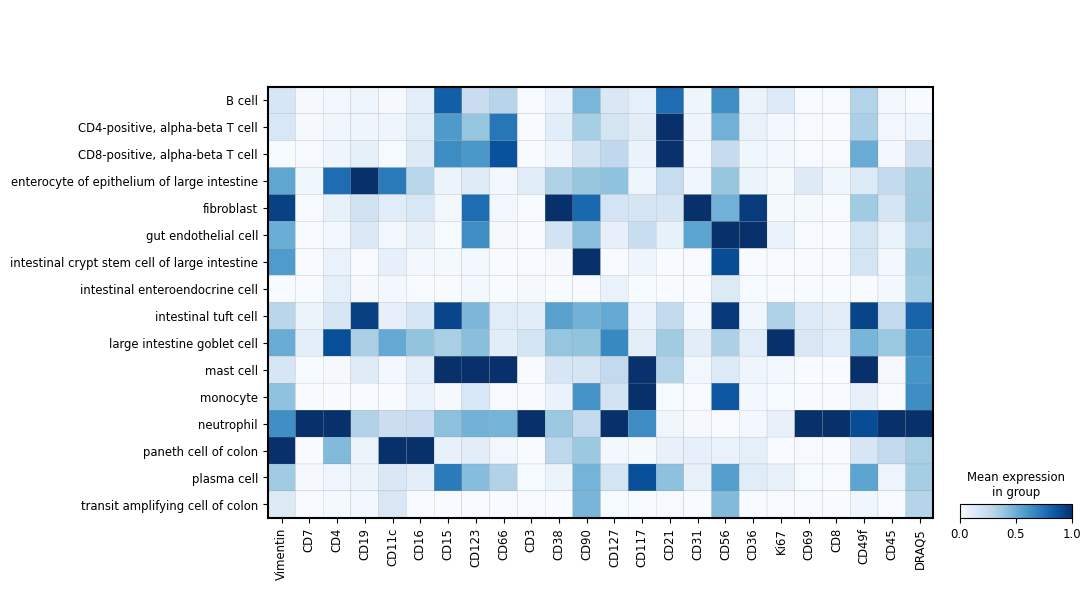

In [32]:
plt = sc.pl.matrixplot(adata_raw, adata_raw.var_names.tolist(), 'cell_type', cmap='Blues', standard_scale="var", return_fig=True, use_raw=False)
# plt.show()
# plt.tight_layout()
plt.savefig('/data/twang15/spatial_protein/CODEX_data/hubmap/marker_viz/large_intestine/marker_exp_celltype.png', bbox_inches='tight')

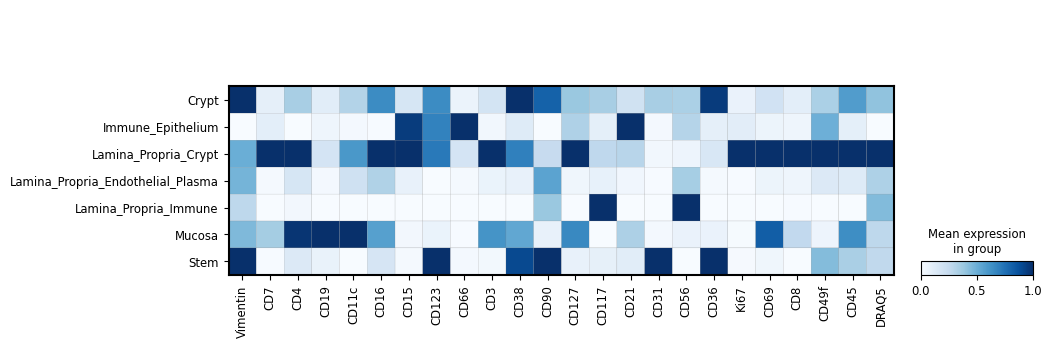

In [33]:
plt = sc.pl.matrixplot(adata_raw, adata_raw.var_names.tolist(), 'neighborhood10', cmap='Blues', standard_scale="var", return_fig=True, use_raw=False)
# plt.show()
# plt.tight_layout()
plt.savefig('/data/twang15/spatial_protein/CODEX_data/hubmap/marker_viz/large_intestine/marker_exp_neighborhood.png', bbox_inches='tight')

In [1]:
import scanpy as sc
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
import pandas as pd
import anndata as ad
from collections import Counter
import numpy as np
def find_files(directory, substring, extension):
    # 存储符合条件的文件路径
    matching_files = []
    # 遍历给定目录及其所有子目录
    for root, dirs, files in os.walk(directory):
        # 检查每个文件
        for file in files:
            # 检查文件名是否包含特定子字符串并且以特定扩展名结尾
            if substring in file and file.endswith(extension):
                # 如果符合条件，添加完整路径到列表
                matching_files.append(os.path.join(root, file))
    return matching_files

In [2]:
files = find_files('/data/twang15/spatial_protein/CODEX_data/hubmap/anndata/small_intestine', 'raw', '.h5ad')

In [3]:
files

['/data/twang15/spatial_protein/CODEX_data/hubmap/anndata/small_intestine/HBM629.DBKM.347/reg001/raw_protein.h5ad',
 '/data/twang15/spatial_protein/CODEX_data/hubmap/anndata/small_intestine/HBM244.TVNH.734/reg001/raw_protein.h5ad',
 '/data/twang15/spatial_protein/CODEX_data/hubmap/anndata/small_intestine/HBM995.WMDN.689/reg001/raw_protein.h5ad',
 '/data/twang15/spatial_protein/CODEX_data/hubmap/anndata/small_intestine/HBM658.WGPT.978/reg001/raw_protein.h5ad',
 '/data/twang15/spatial_protein/CODEX_data/hubmap/anndata/small_intestine/HBM784.TKZX.992/reg001/raw_protein.h5ad',
 '/data/twang15/spatial_protein/CODEX_data/hubmap/anndata/small_intestine/HBM523.XHWW.384/reg001/raw_protein.h5ad',
 '/data/twang15/spatial_protein/CODEX_data/hubmap/anndata/small_intestine/HBM959.BVWN.344/reg001/raw_protein.h5ad',
 '/data/twang15/spatial_protein/CODEX_data/hubmap/anndata/small_intestine/HBM334.RPTP.997/reg001/raw_protein.h5ad',
 '/data/twang15/spatial_protein/CODEX_data/hubmap/anndata/small_intestin

In [5]:
adatas = []
for file in tqdm(files):
    id = file.split('/')[-3] + '_' + files[0].split('/')[-2]
    adata = sc.read_h5ad(file)
    adata.obs['Tissue'] = id
    adatas.append(adata)
adata_raw = ad.concat(adatas, axis=0)

100%|██████████| 37/37 [00:09<00:00,  4.00it/s]
/data/twang15/mamba/envs/mip/lib/python3.8/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [6]:
adata_raw.obs[['x', 'y']] = adata_raw.obsm['xy']

In [8]:
adata_raw.obs['Tissue'] = adata_raw.obs['Tissue'].astype('category')
adata_raw.obs['Tissue'] = adata_raw.obs['Tissue'].cat.rename_categories([f'Reg{str(i+1).zfill(3)}' for i in range(adata_raw.obs['Tissue'].cat.categories.size)])


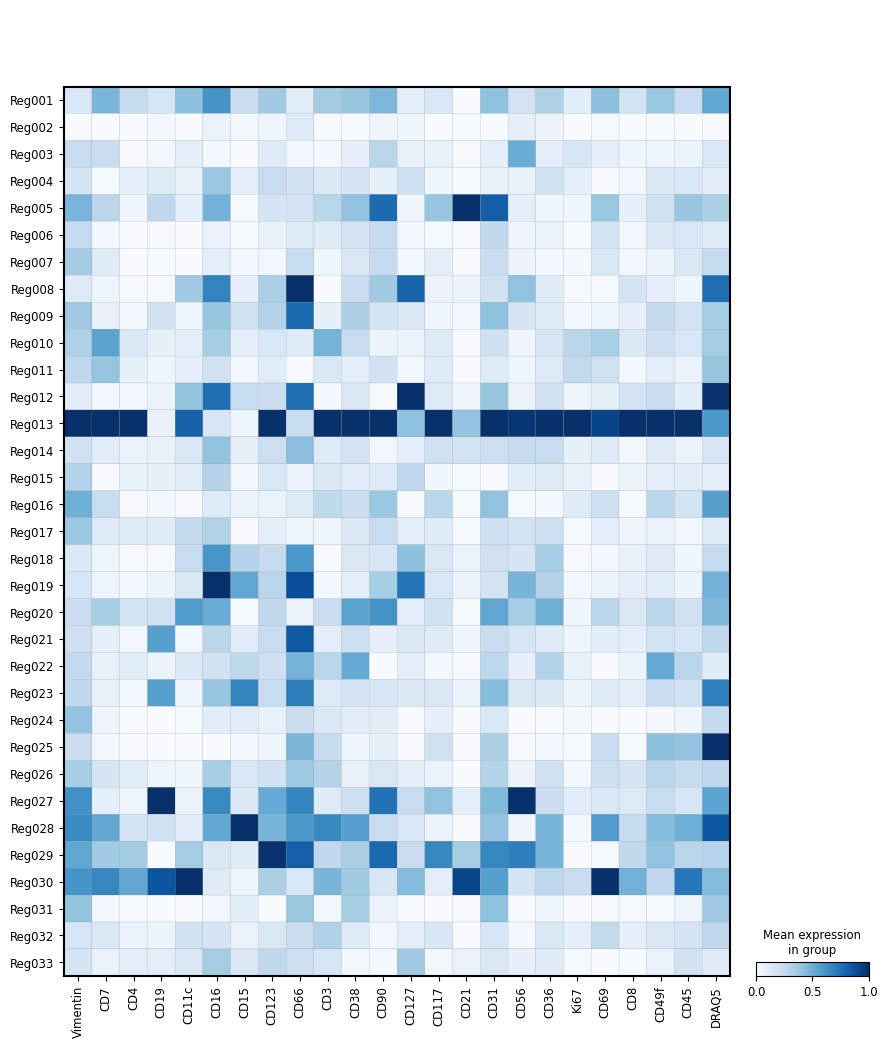

In [9]:
plt = sc.pl.matrixplot(adata_raw, adata_raw.var_names.to_list(), 'Tissue', cmap='Blues', standard_scale="var", return_fig=True)
# plt.tight_layout()
plt.savefig('/data/twang15/spatial_protein/CODEX_data/hubmap/marker_viz/small_intestine/marker_exp_reg.png', bbox_inches='tight')

In [10]:
files = find_files('/data/twang15/spatial_protein/CODEX_data/hubmap/integrated/small_intestine', 'protein', '.h5ad')
files

['/data/twang15/spatial_protein/CODEX_data/hubmap/integrated/small_intestine/HBM629.DBKM.347_reg001_integrated_protein.h5ad',
 '/data/twang15/spatial_protein/CODEX_data/hubmap/integrated/small_intestine/HBM244.TVNH.734_reg001_integrated_protein.h5ad',
 '/data/twang15/spatial_protein/CODEX_data/hubmap/integrated/small_intestine/HBM995.WMDN.689_reg001_integrated_protein.h5ad',
 '/data/twang15/spatial_protein/CODEX_data/hubmap/integrated/small_intestine/HBM658.WGPT.978_reg001_integrated_protein.h5ad',
 '/data/twang15/spatial_protein/CODEX_data/hubmap/integrated/small_intestine/HBM784.TKZX.992_reg001_integrated_protein.h5ad',
 '/data/twang15/spatial_protein/CODEX_data/hubmap/integrated/small_intestine/HBM523.XHWW.384_reg001_integrated_protein.h5ad',
 '/data/twang15/spatial_protein/CODEX_data/hubmap/integrated/small_intestine/HBM959.BVWN.344_reg001_integrated_protein.h5ad',
 '/data/twang15/spatial_protein/CODEX_data/hubmap/integrated/small_intestine/HBM334.RPTP.997_reg001_integrated_protein

In [15]:
adatas = {}
for i in tqdm(range(len(files))):
    tmp = sc.read_h5ad(files[i])
    tissue = files[i].split('/')[-1].replace('_integrated_protein.h5ad', '')
    tmp.obs['Tissue'] = tissue
    tmp.obs_names_make_unique()
    tmp.var_names_make_unique()
    adatas[f'adata{i}'] = tmp
for key in adatas:
    adatas[key].obs_names_make_unique()

adata_int = ad.concat(adatas, axis=0)
adata_int.obs['Tissue'] = adata_int.obs['Tissue'].astype('category')
adata_int.obs['Tissue'] = adata_int.obs['Tissue'].cat.rename_categories([f'Reg{str(i+1).zfill(3)}' for i in range(adata_int.obs['Tissue'].cat.categories.size)])


  0%|          | 0/37 [00:00<?, ?it/s]/data/twang15/mamba/envs/mip/lib/python3.8/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/data/twang15/mamba/envs/mip/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
  3%|▎         | 1/37 [00:00<00:05,  6.26it/s]/data/twang15/mamba/envs/mip/lib/python3.8/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/data/twang15/mamba/envs/mip/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
  5%|▌         | 2/37 [00:

In [16]:
adata_int.obs['CellType']

CGTAAGTGTCCACTCT-1                        ICC
AACCTGATCTAAGCGT-1                        TA2
TAGCACAGTCCACATA-1                        TA1
CTGAATGCACGTTGGC-1                CyclingTA 1
AAGCCATCACACGCCA-1                        TA1
                                 ...         
CGTAGTAGTAAGATCA-1-33                     CD8
GGCTTTCAGGTCGACA-1-66                     TA2
TCGAACAAGATCGCCC-1-49    Immature Enterocytes
AAGTGAAAGCCTTTGA-1-62    Immature Enterocytes
GAACTGTCAGAACTTC-1-16             CyclingTA 1
Name: CellType, Length: 1143319, dtype: category
Categories (53, object): ['Adipocytes', 'B Cells', 'Best4+ Enterocytes', 'CD4', ..., 'TA2', 'Tuft', 'Unknown', 'Villus Fibroblasts WNT5B+']

In [17]:
# 确保索引唯一化
adata_int.obs_names_make_unique()
adata_raw.obs_names_make_unique()
for tissue in tqdm(adata_int.obs['Tissue'].unique()):
    # 获取对应 Tissue 分组的部分，不使用 reset_index，保持原始索引
    int_group = adata_int.obs[adata_int.obs['Tissue'] == tissue]
    raw_group = adata_raw.obs[adata_raw.obs['Tissue'] == tissue]

    # 初始化匹配索引列表
    matched_int_idx = []
    matched_raw_idx = []

    # 遍历 raw_group，逐行比较 'centroid_X' 和 'centroid_Y'
    for raw_idx, raw_row in raw_group.iterrows():
        # 在 int_group 中查找匹配的行
        match = (int_group['x'] == raw_row['x']) & (int_group['y'] == raw_row['y'])
        
        # 如果找到匹配的行，保存其索引
        if match.any():
            matched_int_idx.append(int_group.index[match][0])  # int_group 中匹配行的索引
            matched_raw_idx.append(raw_idx)  # 使用 raw_group 中原始索引

    # 确保在 adata_raw 中有 'CellType' 和 'neighborhood10' 列
    if 'CellType' not in adata_raw.obs.columns:
        adata_raw.obs['CellType'] = pd.NA
    if 'neighborhood10' not in adata_raw.obs.columns:
        adata_raw.obs['neighborhood10'] = pd.NA

    # 在相同的索引位置，将 adata_int 的 CellType 和 neighborhood10 赋值给 adata_raw
    adata_raw.obs.loc[matched_raw_idx, ['CellType', 'neighborhood10']] = \
        adata_int.obs.loc[matched_int_idx, ['CellType', 'neighborhood10']].values

adata_raw = adata_raw[~adata_raw.obs['CellType'].isna()]






/data/twang15/mamba/envs/mip/lib/python3.8/site-packages/anndata/utils.py:220: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['CAACAGTCATTCGATG-1-1', 'CAACAGTCATTCGATG-1-2', 'CAACAGTCATTCGATG-1-3', 'CAACAGTCATTCGATG-1-4', 'CAACAGTCATTCGATG-1-5']
  warnings.warn(
100%|██████████| 37/37 [07:35<00:00, 12.32s/it]


/data/twang15/mamba/envs/mip/lib/python3.8/site-packages/anndata/_core/anndata.py:1230: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


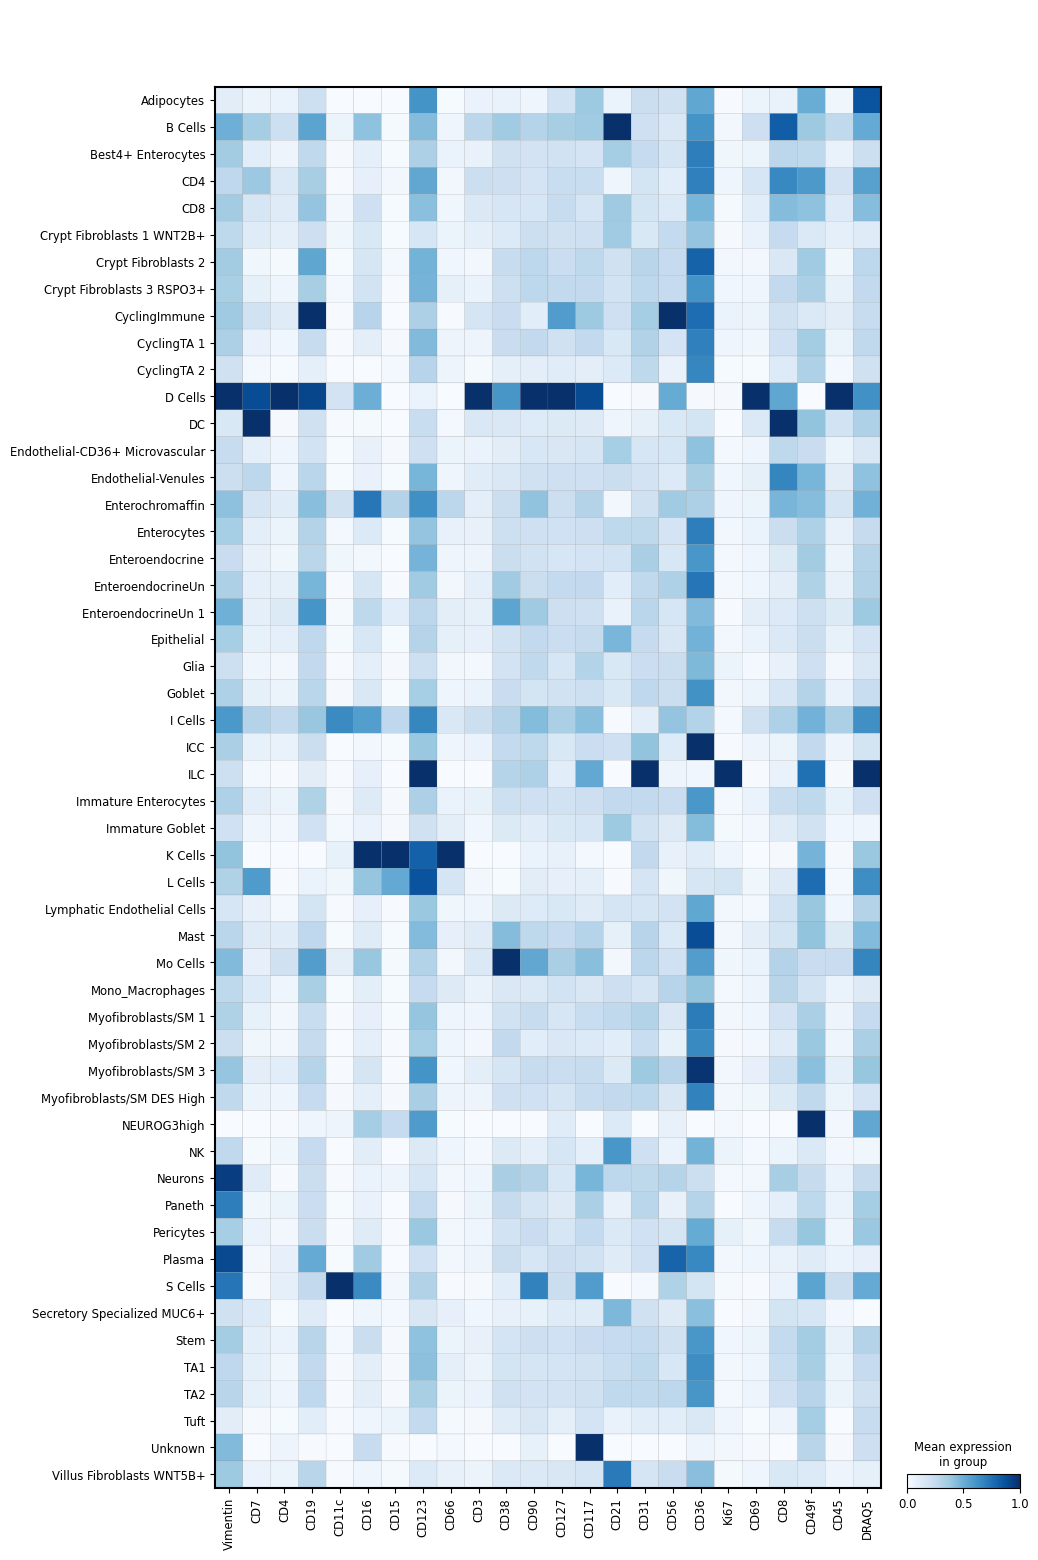

In [18]:
plt = sc.pl.matrixplot(adata_raw, adata_raw.var_names.tolist(), 'CellType', cmap='Blues', standard_scale="var", return_fig=True, use_raw=False)
# plt.show()
# plt.tight_layout()
plt.savefig('/data/twang15/spatial_protein/CODEX_data/hubmap/marker_viz/small_intestine/marker_exp_celltype.png', bbox_inches='tight')

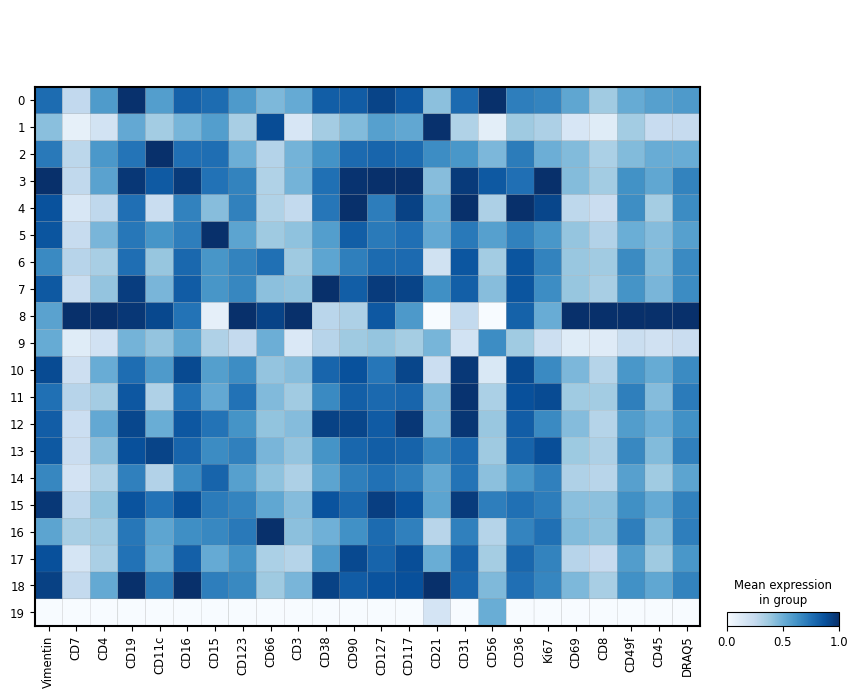

In [19]:
plt = sc.pl.matrixplot(adata_raw, adata_raw.var_names.tolist(), 'neighborhood10', cmap='Blues', standard_scale="var", return_fig=True, use_raw=False)
# plt.show()
# plt.tight_layout()
plt.savefig('/data/twang15/spatial_protein/CODEX_data/hubmap/marker_viz/small_intestine/marker_exp_neighborhood.png', bbox_inches='tight')

In [1]:
import scanpy as sc
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
import pandas as pd
import anndata as ad
from collections import Counter
import numpy as np
def find_files(directory, substring, extension):
    # 存储符合条件的文件路径
    matching_files = []
    # 遍历给定目录及其所有子目录
    for root, dirs, files in os.walk(directory):
        # 检查每个文件
        for file in files:
            # 检查文件名是否包含特定子字符串并且以特定扩展名结尾
            if substring in file and file.endswith(extension):
                # 如果符合条件，添加完整路径到列表
                matching_files.append(os.path.join(root, file))
    return matching_files
files = find_files('/data/twang15/spatial_protein/CODEX_data/hubmap/anndata/lymph_node', 'raw', '.h5ad')

In [3]:
files[0].split('/')[-3] + '_' + files[0].split('/')[-2]

'HBM673.TNZM.339_reg001'

In [7]:
adatas = []
for file in tqdm(files):
    id = file.split('/')[-3] + '_' + files[0].split('/')[-2]
    adata = sc.read_h5ad(file)
    adata.obs['Tissue'] = id
    adatas.append(adata)
adata_raw = ad.concat(adatas, axis=0)
adata_raw.obs[['x', 'y']] = adata_raw.obsm['xy']
adata_raw.obs[['x', 'y']] = adata_raw.obsm['xy']
adata_raw.obs['Tissue'] = adata_raw.obs['Tissue'].astype('category')
adata_raw.obs['Tissue'] = adata_raw.obs['Tissue'].cat.rename_categories([f'Reg{str(i+1).zfill(3)}' for i in range(adata_raw.obs['Tissue'].cat.categories.size)])


100%|██████████| 23/23 [00:11<00:00,  1.99it/s]
/data/twang15/mamba/envs/mip/lib/python3.8/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


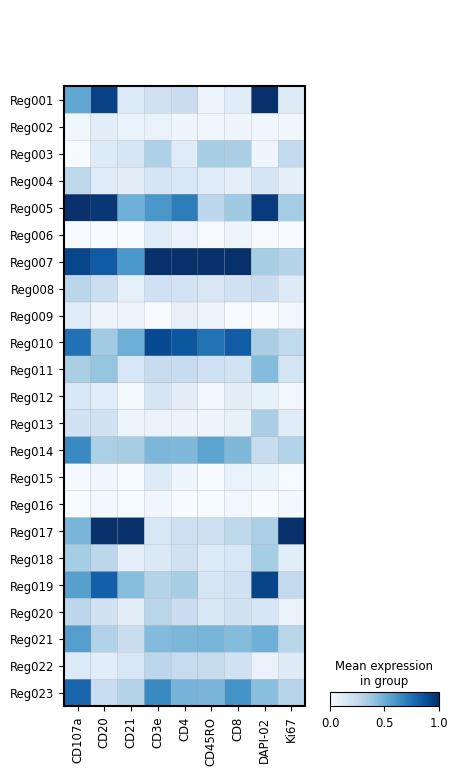

In [5]:
plt = sc.pl.matrixplot(adata_raw, adata_raw.var_names.to_list(), 'Tissue', cmap='Blues', standard_scale="var", return_fig=True)
# plt.tight_layout()
plt.savefig('/data/twang15/spatial_protein/CODEX_data/hubmap/marker_viz/lymph_node/marker_exp_reg.png', bbox_inches='tight')

In [3]:
files = find_files('/data/twang15/spatial_protein/CODEX_data/hubmap/integrated/lymph_node', 'protein', '.h5ad')
files
adatas = {}
for i in tqdm(range(len(files))):
    tmp = sc.read_h5ad(files[i])
    tmp.X = None
    tissue = files[i].split('/')[-1].replace('_integrated_protein.h5ad', '')
    tmp.obs['Tissue'] = tissue
    adatas[f'adata{i}'] = tmp


adata_int = ad.concat(adatas, axis=0)
adata_int.obs['Tissue'] = adata_int.obs['Tissue'].astype('category')
adata_int.obs['Tissue'] = adata_int.obs['Tissue'].cat.rename_categories([f'Reg{str(i+1).zfill(3)}' for i in range(adata_int.obs['Tissue'].cat.categories.size)])


['/data/twang15/spatial_protein/CODEX_data/hubmap/integrated/lymph_node/HBM673.TNZM.339_reg001_protein_integrated.h5ad',
 '/data/twang15/spatial_protein/CODEX_data/hubmap/integrated/lymph_node/HBM268.NKXB.243_reg1_protein_integrated.h5ad',
 '/data/twang15/spatial_protein/CODEX_data/hubmap/integrated/lymph_node/HBM622.JXWQ.554_reg1_protein_integrated.h5ad',
 '/data/twang15/spatial_protein/CODEX_data/hubmap/integrated/lymph_node/HBM362.RFHX.274_reg1_protein_integrated.h5ad',
 '/data/twang15/spatial_protein/CODEX_data/hubmap/integrated/lymph_node/HBM992.RHJW.288_reg1_protein_integrated.h5ad',
 '/data/twang15/spatial_protein/CODEX_data/hubmap/integrated/lymph_node/HBM332.QJCH.296_reg001_protein_integrated.h5ad',
 '/data/twang15/spatial_protein/CODEX_data/hubmap/integrated/lymph_node/HBM989.VVXT.224_reg1_protein_integrated.h5ad',
 '/data/twang15/spatial_protein/CODEX_data/hubmap/integrated/lymph_node/HBM938.TNNT.879_reg1_protein_integrated.h5ad',
 '/data/twang15/spatial_protein/CODEX_data/h

In [8]:
# 确保索引唯一化
adata_int.obs_names_make_unique()
adata_raw.obs_names_make_unique()
for tissue in tqdm(adata_int.obs['Tissue'].unique()):
    # 获取对应 Tissue 分组的部分，不使用 reset_index，保持原始索引
    int_group = adata_int.obs[adata_int.obs['Tissue'] == tissue]
    raw_group = adata_raw.obs[adata_raw.obs['Tissue'] == tissue]

    # 初始化匹配索引列表
    matched_int_idx = []
    matched_raw_idx = []

    # 遍历 raw_group，逐行比较 'centroid_X' 和 'centroid_Y'
    for raw_idx, raw_row in raw_group.iterrows():
        # 在 int_group 中查找匹配的行
        match = (int_group['x'] == raw_row['x']) & (int_group['y'] == raw_row['y'])
        
        # 如果找到匹配的行，保存其索引
        if match.any():
            matched_int_idx.append(int_group.index[match][0])  # int_group 中匹配行的索引
            matched_raw_idx.append(raw_idx)  # 使用 raw_group 中原始索引

    # 确保在 adata_raw 中有 'CellType' 和 'neighborhood10' 列
    if 'cell_type' not in adata_raw.obs.columns:
        adata_raw.obs['cell_type'] = pd.NA
    if 'neighborhood10' not in adata_raw.obs.columns:
        adata_raw.obs['neighborhood10'] = pd.NA

    # 在相同的索引位置，将 adata_int 的 CellType 和 neighborhood10 赋值给 adata_raw
    adata_raw.obs.loc[matched_raw_idx, ['cell_type', 'neighborhood10']] = \
        adata_int.obs.loc[matched_int_idx, ['cell_type', 'neighborhood10']].values

adata_raw = adata_raw[~adata_raw.obs['cell_type'].isna()]





plt = sc.pl.matrixplot(adata_raw, adata_raw.var_names.tolist(), 'cell_type', cmap='Blues', standard_scale="var", return_fig=True, use_raw=False)
# plt.show()
# plt.tight_layout()
plt.savefig('/data/twang15/spatial_protein/CODEX_data/hubmap/marker_viz/lymph_node/marker_exp_celltype.png', bbox_inches='tight')
plt = sc.pl.matrixplot(adata_raw, adata_raw.var_names.tolist(), 'neighborhood10', cmap='Blues', standard_scale="var", return_fig=True, use_raw=False)
# plt.show()
# plt.tight_layout()
plt.savefig('/data/twang15/spatial_protein/CODEX_data/hubmap/marker_viz/lymph_node/marker_exp_neighborhood.png', bbox_inches='tight')

100%|██████████| 23/23 [16:29<00:00, 43.04s/it]


In [ ]:
files = find_files('/data/twang15/spatial_protein/CODEX_data/hubmap/anndata/lymph_node', 'raw', '.h5ad')

In [1]:
import scanpy as sc
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
import pandas as pd
import anndata as ad
from collections import Counter
import numpy as np
def find_files(directory, substring, extension):
    # 存储符合条件的文件路径
    matching_files = []
    # 遍历给定目录及其所有子目录
    for root, dirs, files in os.walk(directory):
        # 检查每个文件
        for file in files:
            # 检查文件名是否包含特定子字符串并且以特定扩展名结尾
            if substring in file and file.endswith(extension):
                # 如果符合条件，添加完整路径到列表
                matching_files.append(os.path.join(root, file))
    return matching_files
files = find_files('/data/twang15/spatial_protein/CODEX_data/hubmap/anndata/spleen', 'raw', '.h5ad')

In [2]:
adatas = []
for file in tqdm(files):
    id = file.split('/')[-3] + '_' + files[0].split('/')[-2]
    adata = sc.read_h5ad(file)
    adata.obs['Tissue'] = id
    adatas.append(adata)
adata_raw = ad.concat(adatas, axis=0)
adata_raw.obs[['x', 'y']] = adata_raw.obsm['xy']
adata_raw.obs[['x', 'y']] = adata_raw.obsm['xy']
adata_raw.obs['Tissue'] = adata_raw.obs['Tissue'].astype('category')
adata_raw.obs['Tissue'] = adata_raw.obs['Tissue'].cat.rename_categories([f'Reg{str(i+1).zfill(3)}' for i in range(adata_raw.obs['Tissue'].cat.categories.size)])


  0%|          | 0/24 [00:00<?, ?it/s]

100%|██████████| 24/24 [00:09<00:00,  2.47it/s]
/data/twang15/mamba/envs/mip/lib/python3.8/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


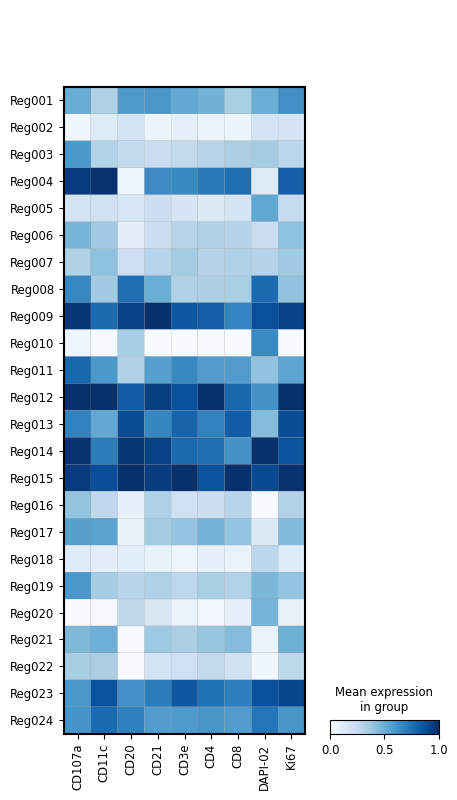

In [3]:
plt = sc.pl.matrixplot(adata_raw, adata_raw.var_names.to_list(), 'Tissue', cmap='Blues', standard_scale="var", return_fig=True)
# plt.tight_layout()
plt.savefig('/data/twang15/spatial_protein/CODEX_data/hubmap/marker_viz/spleen/marker_exp_reg.png', bbox_inches='tight')

In [3]:
files = find_files('/data/twang15/spatial_protein/CODEX_data/hubmap/integrated/spleen', 'protein', '.h5ad')
files
adatas = {}
for i in tqdm(range(len(files))):
    tmp = sc.read_h5ad(files[i])
    tmp.X = None
    tissue = files[i].split('/')[-1].replace('_integrated_protein.h5ad', '')
    tmp.obs['Tissue'] = tissue
    adatas[f'adata{i}'] = tmp


adata_int = ad.concat(adatas, axis=0)
adata_int.obs['Tissue'] = adata_int.obs['Tissue'].astype('category')
adata_int.obs['Tissue'] = adata_int.obs['Tissue'].cat.rename_categories([f'Reg{str(i+1).zfill(3)}' for i in range(adata_int.obs['Tissue'].cat.categories.size)])


  0%|          | 0/24 [00:00<?, ?it/s]

/data/twang15/mamba/envs/mip/lib/python3.8/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
  4%|▍         | 1/24 [00:02<01:06,  2.88s/it]/data/twang15/mamba/envs/mip/lib/python3.8/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
  8%|▊         | 2/24 [00:09<01:56,  5.30s/it]/data/twang15/mamba/envs/mip/lib/python3.8/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
 12%|█▎        | 3/24 [00:22<03:04,  8.77s/it]/data/twang15/mamba/envs/mip/lib/python3.8/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  u

: 

: 

In [5]:
# 确保索引唯一化
adata_int.obs_names_make_unique()
adata_raw.obs_names_make_unique()
for tissue in tqdm(adata_int.obs['Tissue'].unique()):
    # 获取对应 Tissue 分组的部分，不使用 reset_index，保持原始索引
    int_group = adata_int.obs[adata_int.obs['Tissue'] == tissue]
    raw_group = adata_raw.obs[adata_raw.obs['Tissue'] == tissue]

    # 初始化匹配索引列表
    matched_int_idx = []
    matched_raw_idx = []

    # 遍历 raw_group，逐行比较 'centroid_X' 和 'centroid_Y'
    for raw_idx, raw_row in raw_group.iterrows():
        # 在 int_group 中查找匹配的行
        match = (int_group['x'] == raw_row['x']) & (int_group['y'] == raw_row['y'])
        
        # 如果找到匹配的行，保存其索引
        if match.any():
            matched_int_idx.append(int_group.index[match][0])  # int_group 中匹配行的索引
            matched_raw_idx.append(raw_idx)  # 使用 raw_group 中原始索引

    # 确保在 adata_raw 中有 'CellType' 和 'neighborhood10' 列
    if 'cell_type' not in adata_raw.obs.columns:
        adata_raw.obs['cell_type'] = pd.NA
    if 'neighborhood10' not in adata_raw.obs.columns:
        adata_raw.obs['neighborhood10'] = pd.NA

    # 在相同的索引位置，将 adata_int 的 CellType 和 neighborhood10 赋值给 adata_raw
    adata_raw.obs.loc[matched_raw_idx, ['cell_type', 'neighborhood10']] = \
        adata_int.obs.loc[matched_int_idx, ['cell_type', 'neighborhood10']].values

adata_raw = adata_raw[~adata_raw.obs['cell_type'].isna()]





plt = sc.pl.matrixplot(adata_raw, adata_raw.var_names.tolist(), 'cell_type', cmap='Blues', standard_scale="var", return_fig=True, use_raw=False)
# plt.show()
# plt.tight_layout()
plt.savefig('/data/twang15/spatial_protein/CODEX_data/hubmap/marker_viz/spleen/marker_exp_celltype.png', bbox_inches='tight')
plt = sc.pl.matrixplot(adata_raw, adata_raw.var_names.tolist(), 'neighborhood10', cmap='Blues', standard_scale="var", return_fig=True, use_raw=False)
# plt.show()
# plt.tight_layout()
plt.savefig('/data/twang15/spatial_protein/CODEX_data/hubmap/marker_viz/spleen/marker_exp_neighborhood.png', bbox_inches='tight')

 71%|███████   | 17/24 [20:11<09:59, 85.63s/it]

: 

: 